# Trabajo Práctico Integrador 


## Dataset: Stellar Classification Dataset - SDSS17
### Contexto
En astronomía, la clasificación estelar es la clasificación de las estrellas en función de sus características espectrales. El esquema de clasificación de galaxias, quásares y estrellas es uno de los más fundamentales en astronomía. La catalogación temprana de las estrellas y su distribución en el cielo ha llevado a comprender que forman nuestra propia galaxia y, tras la distinción de que Andrómeda era una galaxia separada de la nuestra, se comenzaron a estudiar numerosas galaxias a medida que se construían telescopios más potentes. Este datasat tiene como objetivo clasificar estrellas, galaxias y quásares en función de sus características espectrales.


Contenido
Los datos constan de 100.000 observaciones del espacio realizadas por el SDSS (Sloan Digital Sky Survey). Cada observación se describe mediante 17 columnas de características y 1 columna de clase que la identifica como estrella, galaxia o quásar.

1. obj_ID = Identificador de objeto, el valor único que identifica el objeto en el catálogo de imágenes utilizado por CAS
2. alpha = ángulo de Ascensión Recta (en la época J2000)
3. delta = ángulo de declinación (en la época J2000)
4. u = Filtro ultravioleta en el sistema fotométrico
5. g = Filtro verde en el sistema fotométrico
6. r = Filtro rojo en el sistema fotométrico
7. i = Filtro de infrarrojo cercano en el sistema fotométrico
8. z = Filtro de infrarrojos en el sistema fotométrico
9. run_ID = Número de ejecución utilizado para identificar el análisis específico
10. rereun_ID = Número de repetición para especificar cómo se procesó la imagen
11. cam_col = Columna de cámara para identificar la línea de exploración dentro de la ejecución
12. field_ID = Número de campo para identificar cada campo
13. spec_obj_ID = ID único utilizado para objetos espectroscópicos ópticos (esto significa que 2 observaciones diferentes con el mismo spec_obj_ID deben compartir la clase de salida)
14. class = clase de objeto (galaxia, estrella u objeto cuásar)
15. redshift = valor de corrimiento al rojo basado en el aumento de la longitud de onda
16. plate = ID de placa, identifica cada placa en SDSS
17. MJD = Fecha juliana modificada, utilizada para indicar cuándo se tomó un determinado dato del SDSS
18. fiber_ID = ID de fibra que identifica la fibra que apuntó la luz al plano focal en cada observación



In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
# Cargamos el dataset
df = pd.read_csv('data/star_classification.csv')

In [3]:
# Veamos las primeras 5 filas
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [5]:
df.shape

(100000, 18)

In [6]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [7]:
len(df.columns)


18

Veamos los valores unicos de las columnas

In [8]:
# Recorro las columnas y muestro los valores unicos
for col in df.columns:
    print("Nombre Columna: ",col," valores únicos: ", len(df[col].unique()))


Nombre Columna:  obj_ID  valores únicos:  78053
Nombre Columna:  alpha  valores únicos:  99999
Nombre Columna:  delta  valores únicos:  99999
Nombre Columna:  u  valores únicos:  93748
Nombre Columna:  g  valores únicos:  92651
Nombre Columna:  r  valores únicos:  91901
Nombre Columna:  i  valores únicos:  92019
Nombre Columna:  z  valores únicos:  92007
Nombre Columna:  run_ID  valores únicos:  430
Nombre Columna:  rerun_ID  valores únicos:  1
Nombre Columna:  cam_col  valores únicos:  6
Nombre Columna:  field_ID  valores únicos:  856
Nombre Columna:  spec_obj_ID  valores únicos:  100000
Nombre Columna:  class  valores únicos:  3
Nombre Columna:  redshift  valores únicos:  99295
Nombre Columna:  plate  valores únicos:  6284
Nombre Columna:  MJD  valores únicos:  2180
Nombre Columna:  fiber_ID  valores únicos:  1000


cam_col posee 6 valores únicos.
class posee 3 valores unicos

Veamos cuales son.


In [9]:
# Veo los valores únicos de la columna 'cam_col'
df['cam_col'].unique()

array([2, 5, 3, 4, 6, 1])

In [10]:
# Los ordeno
np.sort(df['cam_col'].unique())

array([1, 2, 3, 4, 5, 6])

In [11]:
# Veo los valores únicos de la columna 'class'
df['class'].unique()

array(['GALAXY', 'QSO', 'STAR'], dtype=object)

### Codificación de variables categoricas.

Como vemos class y cam_col son categóricas

- Vamos a usa label encoder con class 
- Vamos a usar Hot encoding con cam_col




- 0 = GALAXY
- 1 = OSO
- 2 = STAR

In [12]:

from sklearn.preprocessing import LabelEncoder # Codificar variables categóricas
from sklearn.preprocessing import OneHotEncoder # Codificar variables categóricas

# Definir una función lambda para mapear los valores a números
#mapeo_numerico = lambda x: 0 if x == 'GALAXY' else (1 if x == 'QSO' else (2 if x == 'STAR' else x))
le = LabelEncoder()
df['class']=le.fit_transform(df['class'])


# Aplicar la función lambda a la columna 'tipo' utilizando .apply()
# df['class'] = df['class'].apply(mapeo_numerico)
encoder = OneHotEncoder()
new_col=pd.DataFrame(encoder.fit_transform(df[['cam_col']]).toarray()) 

df = pd.concat([df, new_col.astype(int)], axis=1)
df.drop('cam_col',axis=1, inplace=True)


Voy a cambiar los nombres de las columnas creadas

In [13]:
# Lista de nuevos nombres para las últimas 6 columnas
nuevos_nombres = ['cc1', 'cc2', 'cc3', 'cc4', 'cc5', 'cc6']

In [14]:
# Extraer los nombres actuales de todas las columnas
nombres_actuales = df.columns.tolist()

In [15]:
# Reemplazar los nombres de las últimas 6 columnas
nombres_actuales[-6:] = nuevos_nombres

In [16]:
# Asignar los nombres actualizados al DataFrame
df.columns = nombres_actuales

In [17]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,...,redshift,plate,MJD,fiber_ID,cc1,cc2,cc3,cc4,cc5,cc6
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,...,0.634794,5812,56354,171,0,1,0,0,0,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,...,0.779136,10445,58158,427,0,0,0,0,1,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,...,0.644195,4576,55592,299,0,1,0,0,0,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,...,0.932346,9149,58039,775,0,0,1,0,0,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,...,0.116123,6121,56187,842,0,0,1,0,0,0


In [18]:
# ANtes
# NUMERICAL_FEATURES = ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
#        'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
#        'plate', 'MJD', 'fiber_ID']

NUMERICAL_FEATURES = ['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID', 'cc1','cc2','cc3','cc4','cc5','cc6']

In [19]:
LABEL = 'class'

In [20]:
# veamos si hay valores nulos
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
cc1            0
cc2            0
cc3            0
cc4            0
cc5            0
cc6            0
dtype: int64

Veamos la columna '``class``'

In [21]:
df['class'].value_counts()

0    59445
2    21594
1    18961
Name: class, dtype: int64

Visualizamos los datos

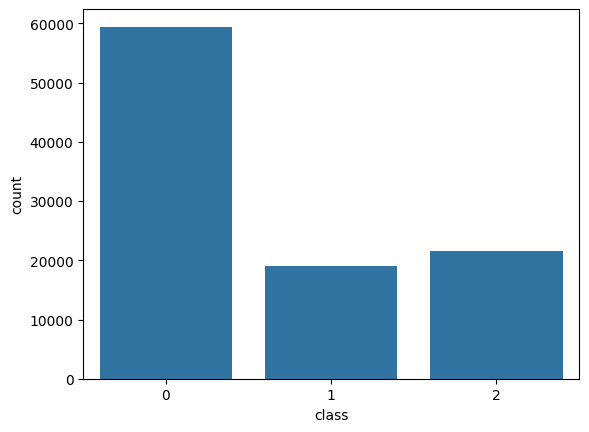

In [22]:
# Grafiquemos la distribución de las clases
sns.countplot(x='class', data=df)

plt.show()


In [23]:
df.describe().T # Transpongo para que se vea mejor

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [24]:
# La columna rerun_ID tiene un solo valor, por lo que no aporta información
NUMERICAL_FEATURES.remove('rerun_ID') 

In [25]:
NUMERICAL_FEATURES

['obj_ID',
 'alpha',
 'delta',
 'u',
 'g',
 'r',
 'i',
 'z',
 'run_ID',
 'field_ID',
 'spec_obj_ID',
 'redshift',
 'plate',
 'MJD',
 'fiber_ID',
 'cc1',
 'cc2',
 'cc3',
 'cc4',
 'cc5',
 'cc6']

Graficamos la distribucion de las columnas numericas

In [ ]:
# Grafico las columnas para ver si siguen una distribución normal, en un grafico de 6x3

# Crea una figura con una matriz de subgráficos de 6x3
fig, axes = plt.subplots(7, 3, figsize=(12, 18))
fig.subplots_adjust(hspace=0.5)  # Espacio vertical entre subgráficos

# Define una paleta de colores única para cada característica numérica
colors = sns.color_palette('deep', n_colors=len(NUMERICAL_FEATURES))

# Itera a través de las características numéricas y dibuja los histogramas con colores diferentes
for i, (column, color) in enumerate(zip(NUMERICAL_FEATURES, colors)):
    row, col = divmod(i, 3)  # Calcula la fila y la columna actual
    ax = axes[row, col]  # Obtiene el subgráfico actual
    sns.histplot(df[column], ax=ax, kde=True, color=color)  # Dibuja el histograma con color y curva de la distribución

    # Agrega un título al subgráfico
    ax.set_title(f'Distribución de {column}')

# Añade un título a la figura
fig.suptitle('Histogramas y Curvas de Distribución de características numéricas', fontsize=16)

# Ajusta automáticamente los espacios entre los subgráficos y muestra la figura
plt.tight_layout()
plt.show()

In [27]:
# elimino la columna rerun_ID
df.drop(columns=['rerun_ID'], inplace=True)

Veamos la correlación

In [ ]:
# Tabla de correlacion completa
df.corr().style.background_gradient(cmap='viridis') # Graficamos la matriz de correlacion con gradiente de color viridis


In [ ]:
# Imprimo los valores de mayor a menor de correlación con la variable objetivo
#df.corr()['class'].sort_values(ascending=False)

# Imprimo los valores de mayor a menor de correlación con la variable objetivo pero el valor absoluto
df.corr()['class'].abs().sort_values(ascending=False)

Veamos la distribucion de las principales variables en funcion a la clase

In [ ]:
# Grafico de pairplot
#sns.pairplot(df, hue='class')
# pair_plot = sns.pairplot(df, hue="class", diag_kind="hist", corner=True)# Tarda como 20 minutos en correr
pair_plot = sns.pairplot(df.sample(2000), hue="class", diag_kind="hist", corner=True) 

# Guarda el gráfico en un archivo (por ejemplo, en formato PNG)
pair_plot.savefig('pair_plot.png')
plt.show()


Balanceo class

Como la clase 0 tiene mas elementos que las otras clases, la balancearemos.

In [ ]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado 'df' con tus datos

# Contar el número de elementos en cada categoría
class_counts = df['class'].value_counts()

# Encontrar la categoría mayoritaria y su número de elementos
max_class = class_counts.idxmax()
max_class_count = class_counts.max()

# Calcular el número objetivo de elementos por categoría (igual al mínimo)
target_count = min(class_counts)

# Realizar el submuestreo de la categoría mayoritaria
balanced_df = pd.concat([
    df[df['class'] == max_class].sample(target_count, replace=False),
    df[df['class'] != max_class]
])

# Ahora 'balanced_df' contiene un DataFrame con todas las categorías balanceadas

# Puedes verificar el nuevo conteo de clases
balanced_class_counts = balanced_df['class'].value_counts()
print(balanced_class_counts)


In [ ]:
# Grafico la columna 'class' para ver si quedo balanceada
sns.countplot(x='class', data=balanced_df)


In [ ]:
balanced_df.info()

Primer modelo de regresión logistica

In [ ]:
# como siempre vamos separando nuestras variables predictoras de la variable a predecir
X = balanced_df.loc[:,NUMERICAL_FEATURES].values
y = balanced_df.loc[:,LABEL].values

In [ ]:
X.shape

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Entrenamos el modelo por máxima verosimilitud
classifier_balance = LogisticRegression(random_state = 0)
classifier_balance.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred_test = classifier_balance.predict(X_test)


In [ ]:
cm = confusion_matrix(y_test, y_pred_test)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier_balance.classes_)

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
disp.plot(ax=ax)
ax.set_title("Clasificador Regresion Logistica");

### Probemos pycaret

- Tomaremos el dataframe original, sin balancear class

In [29]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,field_ID,...,redshift,plate,MJD,fiber_ID,cc1,cc2,cc3,cc4,cc5,cc6
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,79,...,0.634794,5812,56354,171,0,1,0,0,0,0
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,119,...,0.779136,10445,58158,427,0,0,0,0,1,0
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,120,...,0.644195,4576,55592,299,0,1,0,0,0,0
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,214,...,0.932346,9149,58039,775,0,0,1,0,0,0
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,137,...,0.116123,6121,56187,842,0,0,1,0,0,0


In [28]:
from pycaret.classification import * # Importo todas las funciones de clasificación de PyCaret

In [30]:
# La función setup inicializa el entorno en PyCaret y crea el pipeline de transformación
clf = setup(data=df, target='class')

,Description,Value
0,Session id,5728
1,Target,class
2,Target type,Multiclass
3,Original data shape,"(100000, 22)"
4,Transformed data shape,"(100000, 22)"
5,Transformed train set shape,"(70000, 22)"
6,Transformed test set shape,"(30000, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [31]:
# Comparo todos los modelos disponibles y devuelvo el mejor
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9785,0.9954,0.9785,0.9784,0.9784,0.9617,0.9618,306.8800
gbc,Gradient Boosting Classifier,0.9771,0.9948,0.9771,0.9770,0.9769,0.9591,0.9593,6.7360
rf,Random Forest Classifier,0.9767,0.9940,0.9767,0.9766,0.9766,0.9586,0.9587,0.8320
et,Extra Trees Classifier,0.9668,0.9911,0.9668,0.9668,0.9666,0.9408,0.9409,0.3340
dt,Decision Tree Classifier,0.9635,0.9668,0.9635,0.9637,0.9636,0.9354,0.9354,0.1360
lda,Linear Discriminant Analysis,0.8543,0.9156,0.8543,0.8575,0.8489,0.7260,0.7355,0.0410
qda,Quadratic Discriminant Analysis,0.8526,0.9475,0.8526,0.8766,0.8552,0.7431,0.7520,0.0340
ridge,Ridge Classifier,0.8407,0.0000,0.8407,0.8405,0.8322,0.7009,0.7108,0.0300
knn,K Neighbors Classifier,0.7045,0.7782,0.7045,0.6965,0.6885,0.4295,0.4417,0.3830
ada,Ada Boost Classifier,0.6413,0.7338,0.6413,0.6649,0.6423,0.3393,0.3437,0.4850


Tardo  52m 52s